# SOLEMNE 1 MINERÍA DE DATOS

En este trabajo se realizará un análisis de datos sobre el COVID-19 y su impacto, para ello se utilizará un conjunto de datos públicos relacionados con el COVID-19 disponibles en BigQuery en la página de Google Cloud Platform

## Desarrollo de la Actividad

# Bigquery

El primer paso a realizar es utlizar un paquete de python para así utilizar Bigquery, el cual corresponde al escrito en la siguiente línea de código. Además, se definirá un "cliente" el cuál nos permitirá recopilar la información adquirida por la base de datos.

In [1]:
from google.cloud import bigquery

client = bigquery.Client(project='pegasus-418020')

El nombre de pegasus corresponde al de un proyecto creado en Google Cloud Platform, en el cual mediante él se accederá a la base de datos que se utilizará.

El conjunto de datos públicos utilizado corresponde a la "respuesta del gobierno frente a la pandemia debido al COVID-19", perteneciente a la Universidad de Oxford. Este set de datos es bastante interesante debido a que Inglaterra fue uno de los países que a pesar de presentar un rápido aumento de casos de COVID-19 a inicios del año 2020, se convirtió en uno de los primeros países que mantuvo un control de esta epidemia, conviertiéndose en el primer país del mundo en aprobar la vacuna Pfizer/BioNTech, empezar una vacuanción masiva y desarrollar la vacuna Oxford-AstraZeneca (todos estos eventos mencionados se dieron a lugar en diciembre del año 2020). Debido a estos eventos y al involucramiento de la Universidad de Oxford en el desarrollo de una vacuna que hizo frente a la pandemia, es que se utilizarán estos datos.  

A continuación se presenta el código que permitirá acceder a los datos proporcionados por la Universidad de Oxford.

In [2]:
dataset_ref = client.dataset("covid19_govt_response", project="bigquery-public-data")

dataset = client.get_dataset(dataset_ref)

Debido a que el conjunto de estos datos corresponde a una colección de tablas, se utilizará el siguiente comando que permitirá hacer una lista de las tablas perteneciente en el dato de "covid19_govt_response".

In [3]:
tables = list(client.list_tables(dataset))

for table in tables:  
    print(table.table_id)

oxford_policy_tracker


La siguiente celda de código permite recuperar la tabla "completa" en el conjunto de datos "covid19_govt_response".

In [4]:
# Construct a reference to the "full" table
table_ref = dataset_ref.table("oxford_policy_tracker")

# API request - fetch the table
table = client.get_table(table_ref)

Al recuperar la tabla "completa" mediante la línea de código anterior, se utilizará la "table" obtenida junto con un "schema". La implementación de esto es debido a que la tabla posee una estructura de datos que necesitamos visualizar para así extraer los datos necesarios para los análisis correspondientes. Por lo tanto, lo que se obtiene son las siguientes estructuras dentro de la tabla:

In [6]:
table.schema

[SchemaField('country_name', 'STRING', 'NULLABLE', None, 'Name of the country', (), None),
 SchemaField('alpha_3_code', 'STRING', 'NULLABLE', None, '3-letter alpha code abbreviation of the country/region. See `bigquery-public-data.utility_us.country_code_iso` for more details', (), None),
 SchemaField('region_name', 'STRING', 'NULLABLE', None, 'Name of the region within the country', (), None),
 SchemaField('region_code', 'STRING', 'NULLABLE', None, 'Code of the region within the country', (), None),
 SchemaField('date', 'DATE', 'NULLABLE', None, 'Date of the measured policy action status', (), None),
 SchemaField('school_closing', 'STRING', 'NULLABLE', None, 'C1 - Ordinal scale record closings of schools and universities; 0 - No measures 1 - recommend closing 2 - Require closing (only some levels or categories eg just high school or just public schools) 3 - Require closing all levels No data - blank', (), None),
 SchemaField('school_closing_flag', 'STRING', 'NULLABLE', None, 'Are C1 a

Ahora bien, también es posible observar los primeros elementos dentro de todo este conjunto de datos, como lo puede ser mediante la siguiente línea de código que entregará las primeras 3 líneas de la tabla.

In [5]:
client.list_rows(table, max_results=3).to_dataframe()

,country_name,alpha_3_code,region_name,region_code,date,school_closing,school_closing_flag,school_closing_notes,workplace_closing,workplace_closing_flag,...,contact_tracing_notes,emergency_healthcare_investment,emergency_healthcare_investment_notes,vaccine_investment,vaccine_investment_notes,misc_wildcard,misc_wildcard_notes,confirmed_cases,deaths,stringency_index
0,Aruba,ABW,None,None,2021-09-07,2.0,1.0,None,None,None,...,None,NaN,None,NaN,None,None,None,14913,151,37.96
1,Aruba,ABW,None,None,2021-09-08,None,None,None,None,None,...,None,NaN,None,NaN,None,None,None,14955,153,37.96
2,Aruba,ABW,None,None,2021-09-09,None,None,None,None,None,...,None,NaN,None,NaN,None,None,None,14991,154,37.96


También es posible seleccionar una mayor cantidad de datos para visualizar, como lo es en el siguiente caso en el que se seleccionarán los primeros 10 datos de la tabla seleccionada.

In [160]:
client.list_rows(table, selected_fields=table.schema[:10], max_results=10).to_dataframe()

,country_name,alpha_3_code,region_name,region_code,date,school_closing,school_closing_flag,school_closing_notes,workplace_closing,workplace_closing_flag
0,Aruba,ABW,None,None,2021-09-07,2.0,1.0,None,None,None
1,Aruba,ABW,None,None,2021-09-08,None,None,None,None,None
2,Aruba,ABW,None,None,2021-09-09,None,None,None,None,None
3,Afghanistan,AFG,None,None,2021-08-25,None,None,None,None,None
4,Afghanistan,AFG,None,None,2021-08-26,None,None,None,None,None
5,Afghanistan,AFG,None,None,2021-08-27,None,None,None,None,None
6,Afghanistan,AFG,None,None,2021-08-28,None,None,None,None,None
7,Afghanistan,AFG,None,None,2021-08-29,None,None,None,None,None
8,Afghanistan,AFG,None,None,2021-08-30,None,None,None,None,None
9,Afghanistan,AFG,None,None,2021-08-31,None,None,None,None,None


Nos encontramos trabajando con una extensa cantidad de datos, es debido a ello que para poder manejar los datos dentro de este gran espacio se realizarán consultas o un "query".
Un query es una consulta o solicitud que se realiza dentro de una base de datos para así obtener alguna información específica. Esta consulta de datos la escribimos en un lenguaje de consultas estructurados o SQL (Structured Query Language), permitiéndonos enviar esta consulta a la base de datos y obtener los resultados buscados. 

El código presentado a continuación corresponde a la ejecución de un query en donde pedimos obtener un resultado similar al código anterior pero con una ligera diferencia. En este código seleccionamos todas las columnas de datos mediante el "*", seleccionamos desde donde tomamos los datos, ordenamos las fechas de orden descendente y establecemos un límite de 10 datos, obteniendo lo siguiente: 

In [9]:
query = """
    SELECT *
    FROM `bigquery-public-data.covid19_govt_response.oxford_policy_tracker`
    ORDER BY date DESC 
    LIMIT 10
"""

query_job = client.query(query)

# Imprime los resultados
for row in query_job:
    print(row)

Row(('Argentina', 'ARG', None, None, datetime.date(2021, 9, 10), None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 75.93), {'country_name': 0, 'alpha_3_code': 1, 'region_name': 2, 'region_code': 3, 'date': 4, 'school_closing': 5, 'school_closing_flag': 6, 'school_closing_notes': 7, 'workplace_closing': 8, 'workplace_closing_flag': 9, 'workplace_closing_notes': 10, 'cancel_public_events': 11, 'cancel_public_events_flag': 12, 'cancel_public_events_notes': 13, 'restrictions_on_gatherings': 14, 'restrictions_on_gatherings_flag': 15, 'restrictions_on_gatherings_notes': 16, 'close_public_transit': 17, 'close_public_transit_flag': 18, 'close_public_transit_notes': 19, 'stay_at_home_requirements': 20, 'stay_at_home_requirements_flag': 21, 'stay_at_home_requirements_

A continuación realizaremos una variación con respecto al query obtenido anteriormente, en donde se consultará la misma cantidad de datos pero específicamente del año 2020, resultando en:

In [10]:
query = """
    SELECT *
    FROM `bigquery-public-data.covid19_govt_response.oxford_policy_tracker`
    WHERE EXTRACT(YEAR FROM date) = 2020
    ORDER BY date DESC
    LIMIT 10
"""

# Ejecuta la consulta y obtén los resultados
query_job = client.query(query)

# Imprime los resultados
for row in query_job:
    print(row)

Row(('Brazil', 'BRA', 'Santa Catarina', 'BR_SC', datetime.date(2020, 12, 31), None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 492583, 5253, None), {'country_name': 0, 'alpha_3_code': 1, 'region_name': 2, 'region_code': 3, 'date': 4, 'school_closing': 5, 'school_closing_flag': 6, 'school_closing_notes': 7, 'workplace_closing': 8, 'workplace_closing_flag': 9, 'workplace_closing_notes': 10, 'cancel_public_events': 11, 'cancel_public_events_flag': 12, 'cancel_public_events_notes': 13, 'restrictions_on_gatherings': 14, 'restrictions_on_gatherings_flag': 15, 'restrictions_on_gatherings_notes': 16, 'close_public_transit': 17, 'close_public_transit_flag': 18, 'close_public_transit_notes': 19, 'stay_at_home_requirements': 20, 'stay_at_home_requirements_flag': 21, 'stay_at_home

En el siguiente código de consulta de query se puede observar una variación mayor en lo pedido con respecto a los dos query anteriores. En este se seleccionará solamente los países, las fechas y la cantidad de eventos públicos cancelados debido a la pandemia, ordenando esta lista en orden descendente en función de esta última variable. El resultado de esta consulta de datos corresponde al siguiente:

In [166]:
query = """
    SELECT country_name, date, cancel_public_events
    FROM `bigquery-public-data.covid19_govt_response.oxford_policy_tracker`
    ORDER BY cancel_public_events DESC
    LIMIT 10
"""

# Ejecuta la consulta y obtén los resultados
query_job = client.query(query)

# Imprime los resultados
for row in query_job:
    print(row)

Row(('Brazil', datetime.date(2020, 5, 19), '2.0'), {'country_name': 0, 'date': 1, 'cancel_public_events': 2})
Row(('Guinea', datetime.date(2021, 3, 11), '2.0'), {'country_name': 0, 'date': 1, 'cancel_public_events': 2})
Row(('Guinea', datetime.date(2021, 3, 14), '2.0'), {'country_name': 0, 'date': 1, 'cancel_public_events': 2})
Row(('Guinea', datetime.date(2021, 3, 13), '2.0'), {'country_name': 0, 'date': 1, 'cancel_public_events': 2})
Row(('Guinea', datetime.date(2021, 3, 9), '2.0'), {'country_name': 0, 'date': 1, 'cancel_public_events': 2})
Row(('Guinea', datetime.date(2021, 3, 16), '2.0'), {'country_name': 0, 'date': 1, 'cancel_public_events': 2})
Row(('Guinea', datetime.date(2021, 3, 15), '2.0'), {'country_name': 0, 'date': 1, 'cancel_public_events': 2})
Row(('Guinea', datetime.date(2021, 3, 12), '2.0'), {'country_name': 0, 'date': 1, 'cancel_public_events': 2})
Row(('Guinea', datetime.date(2021, 3, 10), '2.0'), {'country_name': 0, 'date': 1, 'cancel_public_events': 2})
Row(('Argen

También es posible realizar una carga de datos en DataFrames de pandas, lo que nos perimitirá realizar operaciones y manipulaciones a este conjunto de datos. Para poder utilizarlo es necesario en un primer paso cargar la librería de pandas mediante un "import pandas".

In [193]:
import pandas as pd

Para el siguiente caso podemos ver como se obtiene la cantidad de casos confirmados y la cantidad de muertes para Chile debido al COVID-19, en el cual al aplicar pandas obtenemos lo siguiente:

In [194]:
query = """
    SELECT  confirmed_cases, deaths 
    FROM `bigquery-public-data.covid19_govt_response.oxford_policy_tracker`
    WHERE country_name = 'Chile'
    LIMIT 20
"""

# Ejecuta la consulta y carga los resultados en un DataFrame
df = client.query(query).to_dataframe()

# Visualiza las primeras filas del DataFrame
print(df)


    confirmed_cases  deaths
0           1641526   37108
1           1641791   37115
2           1642146   37122
3           1642646   37159
4                 2    <NA>
5                 2    <NA>
6                 2    <NA>
7                 2    <NA>
8                 2    <NA>
9                 2    <NA>
10                2    <NA>
11                9    <NA>
12                9    <NA>
13               10    <NA>
14               10    <NA>
15               13    <NA>
16               13    <NA>
17               13    <NA>
18               20    <NA>
19               20    <NA>


Como se dijo anteriormente, pandas nos permitirá modificar y realizar operaciones a este conjunto de datos, de modo al ponerlo a prueba y elevando al cuadrado la cantidad de datos obtenidos, podemos observar que se obtiene lo siguiente:

In [192]:
query = """
    SELECT  confirmed_cases, deaths 
    FROM `bigquery-public-data.covid19_govt_response.oxford_policy_tracker`
    WHERE country_name = 'Chile'
    LIMIT 20
"""

# Ejecuta la consulta y carga los resultados en un DataFrame
df = client.query(query).to_dataframe()
df0 = df **2

# Visualiza las primeras filas del DataFrame
print(df0)


    confirmed_cases      deaths
0     2694607608676  1377003664
1     2695477687681  1377523225
2     2696643485316  1378042884
3     2698285881316  1380791281
4                 4        <NA>
5                 4        <NA>
6                 4        <NA>
7                 4        <NA>
8                 4        <NA>
9                 4        <NA>
10                4        <NA>
11               81        <NA>
12               81        <NA>
13              100        <NA>
14              100        <NA>
15              169        <NA>
16              169        <NA>
17              169        <NA>
18              400        <NA>
19              400        <NA>


También es posible multiplicar estos datos que se han obtenido, pudiendo obtener lo siguiente:

In [181]:
df00 = df0 * df

print(df00)

        confirmed_cases          deaths
0   4423268449439479576  51097851963712
1   4425411008335476671  51126774495875
2   4428282312837728136  51155707939848
3   4432328509800202136  51308823210679
4                     8            <NA>
5                     8            <NA>
6                     8            <NA>
7                     8            <NA>
8                     8            <NA>
9                     8            <NA>
10                    8            <NA>
11                  729            <NA>
12                  729            <NA>
13                 1000            <NA>
14                 1000            <NA>
15                 2197            <NA>
16                 2197            <NA>
17                 2197            <NA>
18                 8000            <NA>
19                 8000            <NA>


El resultado que obtenemos al imprimir estos datos corresponde a una tabla con filas y columnas, asemejámdose a la forma de una matriz, por lo tanto, debido a las propiedades de la matriz, podemos trasponerla mediante el siguiente código:

In [168]:
query = """
    SELECT country_name, date, confirmed_cases, deaths, stringency_index
    FROM `bigquery-public-data.covid19_govt_response.oxford_policy_tracker`
    WHERE country_name = 'Chile'
    LIMIT 20
"""

# Trasponer el DataFrame
df_transposed = df.transpose()

# Visualizar el DataFrame trasponido
print(df_transposed)

                          0           1           2           3           4   \
country_name           Chile       Chile       Chile       Chile       Chile   
date              2021-09-06  2021-09-07  2021-09-08  2021-09-09  2020-02-23   
confirmed_cases      1641526     1641791     1642146     1642646           2   
deaths                 37108       37115       37122       37159        <NA>   
stringency_index       63.43       63.43       63.43       63.43         0.0   

                          5           6           7           8           9   \
country_name           Chile       Chile       Chile       Chile       Chile   
date              2020-02-24  2020-02-25  2020-02-26  2020-02-27  2020-02-28   
confirmed_cases            2           2           2           2           2   
deaths                  <NA>        <NA>        <NA>        <NA>        <NA>   
stringency_index         0.0         0.0         0.0         0.0         0.0   

                          10          

Además, es posible realizar una combinación de dos matrices de diferentes datos. Tomando como ejemplo a dos países diferentes como Chile y Alemania, definimos un query para cada uno de ellos, y mediante la función "concat" de pandas podemos combinarlas, obteniendo lo siguiente:

In [172]:
query1 = """
    SELECT country_name, date, confirmed_cases, deaths, stringency_index
    FROM `bigquery-public-data.covid19_govt_response.oxford_policy_tracker`
    WHERE country_name = 'Chile'
    LIMIT 10
"""

# Ejecuta la consulta y carga los resultados en un DataFrame
df1 = client.query(query1).to_dataframe()

query2 = """
    SELECT country_name, date, confirmed_cases, deaths, stringency_index
    FROM `bigquery-public-data.covid19_govt_response.oxford_policy_tracker`
    WHERE country_name = 'Germany'
    LIMIT 10
"""

# Ejecuta la consulta y carga los resultados en un DataFrame
df2 = client.query(query2).to_dataframe()

combined_df = pd.concat([df1, df2])

# Visualiza el DataFrame combinado
print(combined_df)

  country_name        date  confirmed_cases  deaths  stringency_index
0        Chile  2021-09-06          1641526   37108             63.43
1        Chile  2021-09-07          1641791   37115             63.43
2        Chile  2021-09-08          1642146   37122             63.43
3        Chile  2021-09-09          1642646   37159             63.43
4        Chile  2020-02-23                2    <NA>              0.00
5        Chile  2020-02-24                2    <NA>              0.00
6        Chile  2020-02-25                2    <NA>              0.00
7        Chile  2020-02-26                2    <NA>              0.00
8        Chile  2020-02-27                2    <NA>              0.00
9        Chile  2020-02-28                2    <NA>              0.00
0      Germany  2020-01-28                4    <NA>              5.56
1      Germany  2020-01-29                4    <NA>              5.56
2      Germany  2020-01-30                4    <NA>              5.56
3      Germany  2020

Y de manera similar al caso anterior, esta matriz es posible trasponerla utilizando la propiedad "T", obteniendo lo siguiente:

In [173]:
transposed_df = combined_df.T

# Visualizar el DataFrame trasnpuesto
print(transposed_df)

                           0           1           2           3           4  \
country_name           Chile       Chile       Chile       Chile       Chile   
date              2021-09-06  2021-09-07  2021-09-08  2021-09-09  2020-02-23   
confirmed_cases      1641526     1641791     1642146     1642646           2   
deaths                 37108       37115       37122       37159        <NA>   
stringency_index       63.43       63.43       63.43       63.43         0.0   

                           5           6           7           8           9  \
country_name           Chile       Chile       Chile       Chile       Chile   
date              2020-02-24  2020-02-25  2020-02-26  2020-02-27  2020-02-28   
confirmed_cases            2           2           2           2           2   
deaths                  <NA>        <NA>        <NA>        <NA>        <NA>   
stringency_index         0.0         0.0         0.0         0.0         0.0   

                           0          

# API

Una API (Application Programming Interface en inglés), es un conjunto de reglas y protocolos que permite a diferentes sistemas interactuar entre sí. En este caso utilizaremos una API pública y para poder utilizarla es necesario utilizar un "request", de la siguiente manera:

In [6]:
import requests
url = "https://www.hpb.health.gov.lk/en/api-documentation"
headers = {

}
response = requests.request("GET", url, headers=headers)
# Cuerpo de la respuesta o "body"
print(response.text)
# Código de la respuesta
print(response)

<!DOCTYPE html>
<html lang="en">

<head>
    <!-- Global site tag (gtag.js) - Google Analytics -->
<script async src="https://www.googletagmanager.com/gtag/js?id=UA-130421893-5"></script>
<!-- Calnder -->
<link href="https://www.hpb.health.gov.lk/assets/lib/main.css" rel='stylesheet'>
<script src="https://www.hpb.health.gov.lk/assets/lib/main.js"></script>
<script>
  window.dataLayer = window.dataLayer || [];

  function gtag() {
    dataLayer.push(arguments);
  }

  gtag('js', new Date());

  gtag('config', 'UA-130421893-5');
</script>

<!-- Meta Data -->
<meta charset="UTF-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<meta name="viewport" content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=1">

    <title>HPB | New Coronavirus (COVID-19) outbreak API Document</title>
    <meta name="description"
          content="Official LIVE updates and the latest news from the Sri Lankan Government on the Coronavirus outbreak, and basic protective measures ag

En donde como se puede ver "https://www.hpb.health.gov.lk/en/api-documentation" es el link de nuestra API pública, correspondiente al COVID-19 Tracker de Sri Lanka, un país ubicado al sur de la India y conocido por sus antiguas runas de más de 2000 años de antiguedad. Además de la rica historia del país, uno de los motivos principales por los cuales se seleccionó esta API en relación a la pandemia producida por el COVID-19 es debido a su cercanía territorial con China, país donde surgió el virus.

Ahora bien, antes de ejecutar el código es necesario saber cuáles son los headers de esta url, para ello mediante el siguiente código es posible obtenerlo:

In [7]:
import requests

response = requests.get('https://www.hpb.health.gov.lk/en/api-documentation')
print(response.headers)

{'Server': 'nginx', 'Content-Type': 'text/html; charset=UTF-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Methods': '*', 'Access-Control-Allow-Headers': '*', 'Cache-Control': 'no-cache, private', 'Date': 'Wed, 10 Apr 2024 23:51:10 GMT', 'Set-Cookie': 'XSRF-TOKEN=eyJpdiI6IkxQemRBZjV2dVRaT3dPaTFHMk01elE9PSIsInZhbHVlIjoidmthUjlBOGpNSFJSek5rSzdQV0h1Y1p3M21BanBab1U3TStNMVc1RzV2UXNiSWx0MjBGaEF3YUhRTWk0N1wvSk8iLCJtYWMiOiI0YzBkOWI4YmU2ZjU1MTJiZjUxZGMyZjVhMzdjMTRhYmIzOGM1ZjM0NTZkYjViZWM1NjUxMDA0YjBkNWI1NjRiIn0%3D; expires=Thu, 11-Apr-2024 01:51:10 GMT; Max-Age=7200; path=/, covid19_session=eyJpdiI6IndaTXpJOVN5aHNpbXNqM1Exa0dHRWc9PSIsInZhbHVlIjoia1JJR2ZiSUh5S3NrcFlLR3AxbjRSaVVqRkhQT1oyRnlKRmwzYUhOR0R2RzBtOHhWd1M4YkN6VjFjQ0hDdmlmdyIsIm1hYyI6IjE3MWExZWFhMGM3NDk5ZGRjYWE2ZmFhYWQ2Y2E0M2VjMmZhZTY2YWY0NzE1MWY0YWU3MDQ2MjRhNmQ1YTZlZTUifQ%3D%3D; expires=Thu, 11-Apr-2024 01:51:10 GMT; Max-Age=7200; path=/

Al obtener estas headers se copian y colocan entre las llaves "{}" y se ejecuta este código, resultando en los siguiente:

In [8]:
import requests
url = "https://www.hpb.health.gov.lk/en/api-documentation"
headers = {
    'Server': 'nginx', 'Content-Type': 'text/html; charset=UTF-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Methods': '*', 'Access-Control-Allow-Headers': '*', 'Cache-Control': 'no-cache, private', 'Date': 'Wed, 10 Apr 2024 16:52:34 GMT', 'Set-Cookie': 'XSRF-TOKEN=eyJpdiI6InNFak5lUVZzVjllclVlNnVYc1NHZEE9PSIsInZhbHVlIjoiaGtxK0FWYUZEc1FqQ2ZnQXRjZERvc2NHMkFEbEFwUCtjeFduNDZoZkkxbmgrVjFYdkVJMzdJWExPT2xENXNGUSIsIm1hYyI6IjM2ZDRlZDU5NWZkZmViYTE1OTFmOTY5MjRlMGY2NDg1YTdhNDRjY2Y1MzNiMjBiNWM5MmYzZDgyZjMyNjcyY2EifQ%3D%3D; expires=Wed, 10-Apr-2024 18:52:34 GMT; Max-Age=7200; path=/, covid19_session=eyJpdiI6IjB6Q3p3UTRxWkI2T3RUVVNtT0V5SGc9PSIsInZhbHVlIjoiMUJtN3Fvb2h0K3NqWXpmRXE4eVdFNGdReGFrckZrRmxrRGFKMW9PVEhhUUpKVTgxQnZGMnJpM1IxVHM0TDhzOCIsIm1hYyI6ImZmNmY2YjIwODIxMjlmMzk2MmIxOWZjYmUxY2VmMTUxOTFkNjM3MjFlOTZlYjQ3NmRjMjQ3YTg2ZmRiYWYyYWYifQ%3D%3D; expires=Wed, 10-Apr-2024 18:52:34 GMT; Max-Age=7200; path=/; httponly', 'Content-Encoding': 'gzip',
}
response = requests.request("GET", url, headers=headers)
# Cuerpo de la respuesta o "body"
print(response.text)
# Código de la respuesta
print(response)

<!DOCTYPE html>
<html lang="en">

<head>
    <!-- Global site tag (gtag.js) - Google Analytics -->
<script async src="https://www.googletagmanager.com/gtag/js?id=UA-130421893-5"></script>
<!-- Calnder -->
<link href="https://www.hpb.health.gov.lk/assets/lib/main.css" rel='stylesheet'>
<script src="https://www.hpb.health.gov.lk/assets/lib/main.js"></script>
<script>
  window.dataLayer = window.dataLayer || [];

  function gtag() {
    dataLayer.push(arguments);
  }

  gtag('js', new Date());

  gtag('config', 'UA-130421893-5');
</script>

<!-- Meta Data -->
<meta charset="UTF-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<meta name="viewport" content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=1">

    <title>HPB | New Coronavirus (COVID-19) outbreak API Document</title>
    <meta name="description"
          content="Official LIVE updates and the latest news from the Sri Lankan Government on the Coronavirus outbreak, and basic protective measures ag

Con este código fue posible obtener le contenido de la url seleccionada e imprimirlo en nuestra consola. Ahora bien, para poder realizar una consulta de datos, como en el caso de Bigquery, se hace de la siguiente manera:

In [12]:
import json
import requests
def request(requested_url):
    headers = {
    'Server': 'nginx', 'Content-Type': 'text/html; charset=UTF-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Methods': '*', 'Access-Control-Allow-Headers': '*', 'Cache-Control': 'no-cache, private', 'Date': 'Wed, 10 Apr 2024 16:52:34 GMT', 'Set-Cookie': 'XSRF-TOKEN=eyJpdiI6InNFak5lUVZzVjllclVlNnVYc1NHZEE9PSIsInZhbHVlIjoiaGtxK0FWYUZEc1FqQ2ZnQXRjZERvc2NHMkFEbEFwUCtjeFduNDZoZkkxbmgrVjFYdkVJMzdJWExPT2xENXNGUSIsIm1hYyI6IjM2ZDRlZDU5NWZkZmViYTE1OTFmOTY5MjRlMGY2NDg1YTdhNDRjY2Y1MzNiMjBiNWM5MmYzZDgyZjMyNjcyY2EifQ%3D%3D; expires=Wed, 10-Apr-2024 18:52:34 GMT; Max-Age=7200; path=/, covid19_session=eyJpdiI6IjB6Q3p3UTRxWkI2T3RUVVNtT0V5SGc9PSIsInZhbHVlIjoiMUJtN3Fvb2h0K3NqWXpmRXE4eVdFNGdReGFrckZrRmxrRGFKMW9PVEhhUUpKVTgxQnZGMnJpM1IxVHM0TDhzOCIsIm1hYyI6ImZmNmY2YjIwODIxMjlmMzk2MmIxOWZjYmUxY2VmMTUxOTFkNjM3MjFlOTZlYjQ3NmRjMjQ3YTg2ZmRiYWYyYWYifQ%3D%3D; expires=Wed, 10-Apr-2024 18:52:34 GMT; Max-Age=7200; path=/; httponly', 'Content-Encoding': 'gzip',
    }
    response = requests.request("GET", requested_url, headers=headers)
    return json.loads(response.text)

Al realizar una consulta SQL (Structured Query Language) ahora sobre una nueva API seleccionada por del link "https://pipedream.com/@pravin/http-api-for-latest-wuhan-coronavirus-data-2019-ncov-p_G6CLVM/readme" debido a que al revisar este sitio posee una eficiente redirección a este nuevo link "https://coronavirus.m.pipedream.net/" para poder utilizar la API, es posible obtener el siguiente resultado mediante un seguimiento de pasos presenatdos a continuación.

Primero realizar la solicitud a la API para así obtener los datos mediante el siguiente código:

In [24]:
import requests
import pandas as pd

# URL del endpoint de la API que devuelve los datos deseados
url = "https://coronavirus.m.pipedream.net/"

# Realiza la solicitud GET
response = requests.get(url)

# Asegura que la solicitud fue exitosa
if response.status_code == 200:
    data = response.json()  # Convierte la respuesta en JSON
else:
    print('Error al obtener datos de la API:', response.status_code)
    data = None

El siguiente paso es cargar estos datos obtenidos en un DataFrame de pandas, para ello se realiza lo siguiente:

In [33]:
# Carga los datos en un DataFrame
if data is not None:
    df = pd.DataFrame(data)
    print(df.head())  # Muestra las primeras filas del DataFrame
else:
    df = pd.DataFrame()  # Crea un DataFrame vacío si no se obtuvieron datos

ValueError: Mixing dicts with non-Series may lead to ambiguous ordering.

Podemos apreciar que al ejecutar este código arroja un error debido a que pandas intenta alinear estos datos en un DataFrame tabular, y si las longitudes no coinciden, no puede determinar cómo alinear los datos correctamente, lo que lleva a un posible orden ambiguo. Debido a ello lo que se realizará es utilizar la propiedad "json_normalize" de "pandas", que permitirá planar estos datos en una estructura más simple antes de intentar cargarlos en un DataFrame. 

In [31]:
from pandas import json_normalize

df1 = json_normalize(data)

print(df1)

                      apiSourceCode  \
0  https://pipedream.com/@/p_G6CLVM   

                                             rawData  \
0  [{'FIPS': '', 'Admin2': '', 'Province_State': ...   

   summaryStats.global.confirmed summaryStats.global.recovered  \
0                      676570149                          None   

   summaryStats.global.deaths  summaryStats.china.confirmed  \
0                     6881804                             0   

   summaryStats.china.recovered  summaryStats.china.deaths  \
0                             0                          0   

   summaryStats.nonChina.confirmed summaryStats.nonChina.recovered  \
0                        676570149                            None   

   summaryStats.nonChina.deaths cache.lastUpdated cache.expires  \
0                       6881804     2 minutes ago  in 3 minutes   

   cache.lastUpdatedTimestamp  cache.expiresTimestamp  \
0               1712794877120           1712795177120   

                                

Luego de aplicar esta modificación a la estructura del data implementamos el código nuevamente, obteniendo lo siguiente: 

In [32]:
# Carga los datos en un DataFrame
if df1 is not None:
    df = pd.DataFrame(df1)
    print(df.head())  # Muestra las primeras filas del DataFrame
else:
    df = pd.DataFrame()  # Crea un DataFrame vacío si no se obtuvieron datos


                      apiSourceCode  \
0  https://pipedream.com/@/p_G6CLVM   

                                             rawData  \
0  [{'FIPS': '', 'Admin2': '', 'Province_State': ...   

   summaryStats.global.confirmed summaryStats.global.recovered  \
0                      676570149                          None   

   summaryStats.global.deaths  summaryStats.china.confirmed  \
0                     6881804                             0   

   summaryStats.china.recovered  summaryStats.china.deaths  \
0                             0                          0   

   summaryStats.nonChina.confirmed summaryStats.nonChina.recovered  \
0                        676570149                            None   

   summaryStats.nonChina.deaths cache.lastUpdated cache.expires  \
0                       6881804     2 minutes ago  in 3 minutes   

   cache.lastUpdatedTimestamp  cache.expiresTimestamp  \
0               1712794877120           1712795177120   

                                

Al obtener el DataFrame podemos filtrar los datos por ejemplo, en donde con este código lo que se hará es seleccionar las columnas mayores a 25 dentro de este data.

In [36]:
resultado = df[df[:0] > 25]
print(resultado)

  apiSourceCode rawData  summaryStats.global.confirmed  \
0           NaN     NaN                            NaN   

  summaryStats.global.recovered  summaryStats.global.deaths  \
0                           NaN                         NaN   

   summaryStats.china.confirmed  summaryStats.china.recovered  \
0                           NaN                           NaN   

   summaryStats.china.deaths  summaryStats.nonChina.confirmed  \
0                        NaN                              NaN   

  summaryStats.nonChina.recovered  summaryStats.nonChina.deaths  \
0                             NaN                           NaN   

  cache.lastUpdated cache.expires  cache.lastUpdatedTimestamp  \
0               NaN           NaN                         NaN   

   cache.expiresTimestamp dataSource.url dataSource.lastGithubCommit  \
0                     NaN            NaN                         NaN   

  dataSource.publishedBy dataSource.ref  
0                    NaN            NaN  

# Visualizaciones

Luego obtener el contenido de datos tanto con Bigquery como con API, se ha decidido realizar las visualizaciones de 5 tipos de gráficos con Bigquery debido a que se es más sencillo trabajar con este método en relación a la experiencia propia. 

El acceso a esta gran cantidad de datos nos permite realizar análisis y gráficos de una gran cantidad de datos. A continuación se realizarán 5  gráficos diferentes mediante la utilización de la librería "matplotlib". Estos gráficos corresponderán a un gráfico lineal, circular, de burbujas, pirámide y de barras.

In [190]:
import matplotlib.pyplot as plt

# Gráfico Lineal

Un gráfico de líneas, también conocido como gráfico lineal, es un tipo de gráfico que se utiliza para mostrar datos o información que cambia a un ritmo constante a lo largo del tiempo. Consiste en una serie de puntos de datos conectados por segmentos de línea recta, donde el eje x representa el tiempo y el eje y representa la variable que se está midiendo.

 Para el siguiente caso se presentará un gráfico que mostrará los casos confirmados de COVID-19 en Chile durante el año 2020 al año 2021. Para generar este gráfico desarrollamos lo siguiente: 

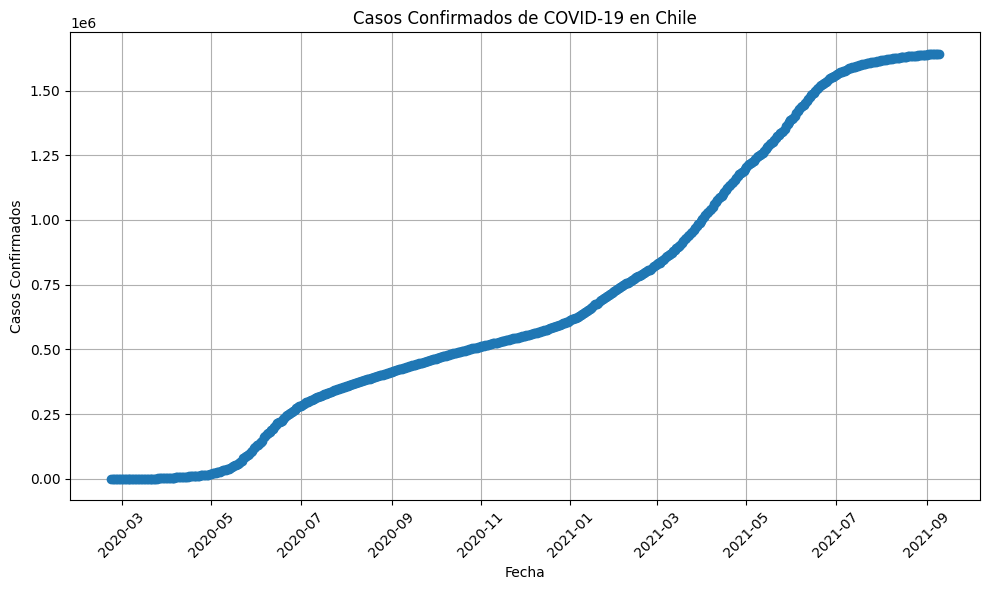

In [191]:
query = """
    SELECT date, confirmed_cases
    FROM `bigquery-public-data.covid19_govt_response.oxford_policy_tracker`
    WHERE country_name = 'Chile'
    ORDER BY date DESC
    
"""

# Ejecuta la consulta y carga los resultados en un DataFrame
df = client.query(query).to_dataframe()

# Convierte la columna 'date' a formato de fecha
df['date'] = pd.to_datetime(df['date'])

# Ordena los datos por fecha
df = df.sort_values(by='date')

# Crea el gráfico lineal
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['confirmed_cases'], marker='o', linestyle='-')
plt.title('Casos Confirmados de COVID-19 en Chile')
plt.xlabel('Fecha')
plt.ylabel('Casos Confirmados')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Al analizar este gráfico es posible observar una escasez de cantidad de casos confirmados por COVID-19 al inciar la pandemia, presenciando recién un aumento de datos entre los meses de Mayo y Julio del año 2020. Desde la mitad del año 2020 hacia el fin de este es posible presenciar una subida del aumento de casos, observando un comportamiento similar al de la ecuación de una recta entre ese intervalo de tiempo. Luego, a inicios del año 2021, en plenas vacaciones de verano, se puede apreciar una subida exponencial de los casos registrados, subida que se mantuvo constante por aproximadamente 7 meses, en donde por los siguientes 2 meses parece mantenerse constante el número de casos confiramdos por COVID-19.

# Gráfico Circular

Un gráfico circular corresponde a un gráfico dividido en porciones o sectores para representar proporciones numéricas o porcentajes de un todo. El tamaño de cada sector es proporcional al valor que representa, y la suma de todos los sectores suman el 100% o el total.

En el siguiente caso se realizará un gráfico que incluirá la cantidad de casos confirmados y muertes debido al COVID-19 para el país de Perú. En el query del código se pedirá una suma de la cantidad de casos confirmados y también una suma de la cantidad de muertes, para que de esa manera al ejecutar el código es posible obtener de manera inmediata el total de valores que participarán en la construcción del gráfico. El código utilizado para este caso corresponde al siguiente: 

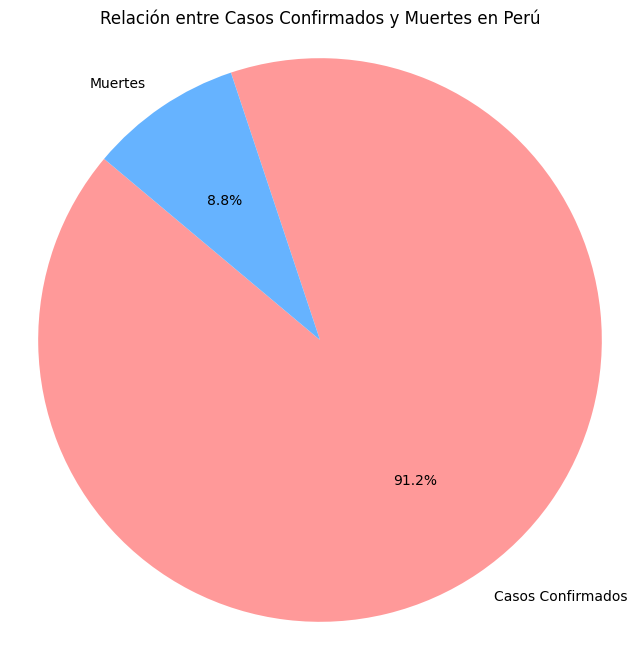

In [195]:
query = """
    SELECT SUM(confirmed_cases) AS total_confirmed_cases, SUM(deaths) AS total_deaths
    FROM `bigquery-public-data.covid19_govt_response.oxford_policy_tracker`
    WHERE country_name = 'Peru'
"""

# Ejecuta la consulta y carga los resultados en un DataFrame
df = client.query(query).to_dataframe()

# Obtén los totales de casos confirmados y muertes
total_confirmed_cases = df['total_confirmed_cases'].iloc[0]
total_deaths = df['total_deaths'].iloc[0]

# Crea los datos para el gráfico de pastel
sizes = [total_confirmed_cases, total_deaths]
labels = ['Casos Confirmados', 'Muertes']
colors = ['#ff9999', '#66b3ff']

# Crea el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Relación entre Casos Confirmados y Muertes en Perú')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Es posible presenciar lamentablemente que aproximadamente un 10% de los casos confirmados por COVID-19 resultan en muertes debido a este virus, concluyendo que se debe implementar una mayor cantidad de vacunas o servicios médicos para poder reducir este porcentaje. 

# Gráfico de Burbujas

Un gráfico de burbujas es un tipo de gráfico que muestra puntos de datos como burbujas o círculos en un gráfico bidimensional, donde el tamaño, el color y la posición de cada burbuja representan diferentes variables.

En el caso que se presentará a continuación se realizará una evolución temporal de los casos confirmados debido al COVID-19 para los países del territorio del Reino Unido y de la India. En este gráfico nuestro eje x corresponderá a la evolución temporal mientras que el eje y equivaldrá a la cantidad de casos confirmados, obteniendo entonces en este gráfico dos burbujas programadas bajo la misma escala para cada país, en donde el tamaño de esta burbuja aumentará o disminuirá en función de la cantidad de casos de COVID-19 con respecto al otro país. El código utilizado para diseñar este gráfico corresponde al siguiente: 

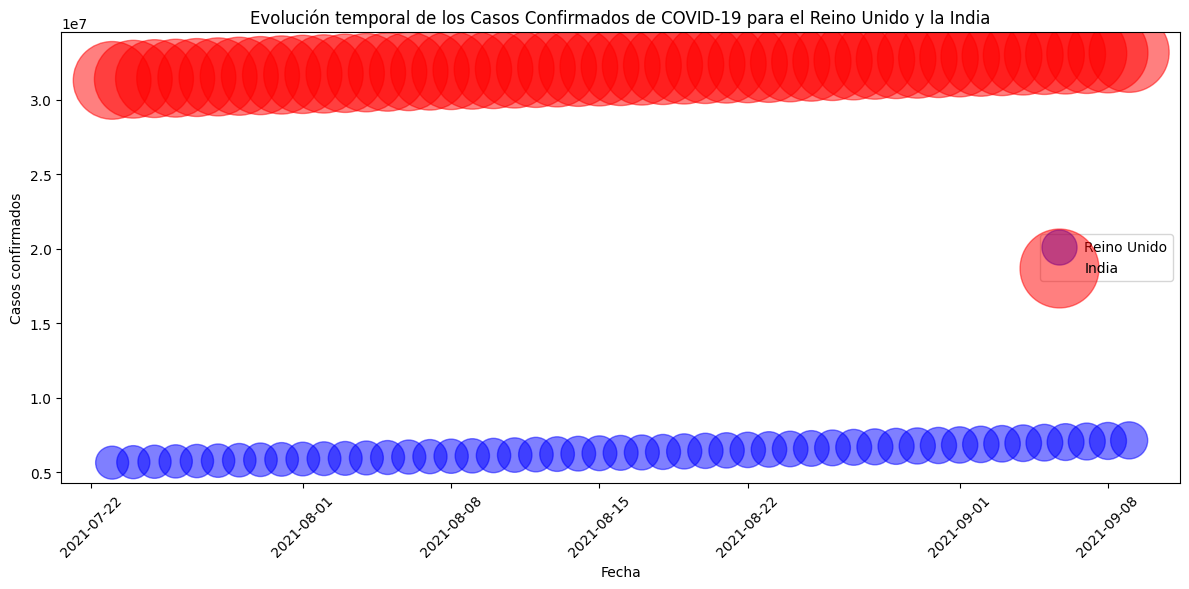

In [198]:
query = """
    SELECT country_name, date, confirmed_cases
    FROM `bigquery-public-data.covid19_govt_response.oxford_policy_tracker`
    WHERE country_name IN ('United Kingdom', 'India')
    ORDER BY date DESC
    LIMIT 300
    
"""

# Ejecutar la consulta y cargar los resultados en un DataFrame
df = client.query(query).to_dataframe()

# Filtrar los datos para los países seleccionados
df_filtered = df[df['country_name'].isin(['United Kingdom', 'India'])]

# Agrupar los datos por país y fecha
grouped = df_filtered.groupby(['country_name', 'date']).agg({'confirmed_cases': 'max'}).reset_index()

# Obtener los datos para cada país
uk_data = grouped[grouped['country_name'] == 'United Kingdom']
i_data = grouped[grouped['country_name'] == 'India']

# Ajustar el tamaño de las burbujas
bubble_size_uk = uk_data['confirmed_cases'] * 0.0001
bubble_size_i = i_data['confirmed_cases'] * 0.0001

# Graficar los datos como un gráfico de burbujas
plt.figure(figsize=(12, 6))

plt.scatter(uk_data['date'], uk_data['confirmed_cases'], s=bubble_size_uk, alpha=0.5, c='blue', label='Reino Unido')
plt.scatter(i_data['date'], i_data['confirmed_cases'], s=bubble_size_i, alpha=0.5, c='red', label='India')

plt.title('Evolución temporal de los Casos Confirmados de COVID-19 para el Reino Unido y la India')
plt.xlabel('Fecha')
plt.ylabel('Casos confirmados')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Es posible presenciar que la India presenta una cantidad de casos confirmados debido al COVID-19 mucho mayor en comparación a la cantidad de casos del Reino Unido, pudiendo tener esta explicación principalmente debido al tamaño demográfico de cada país. Además, es posible observar un pequeño aumento para ambos países en la cantidad de casos confirmados debido al COVID-19 luego de un transcurso de 2 meses.

# Gráfico de Pirámide

Un gráfico piramidal, también conocido como diagrama piramidal o gráfico triangular, es una representación gráfica de datos en forma de pirámide o triángulo. Los gráficos piramidales se utilizan comúnmente para representar datos jerárquicos o para mostrar la distribución de una población o un grupo de elementos.

En este caso se utilizará un gráfico piramidal para analizar la cantidad de personas fallecidas tras un periodo de tiempo debido al COVID-19 entre dos países europeos, los cuales serán Alemania e Italia. Para poder desarrollar este gráfico se utilizará el siguiente código:

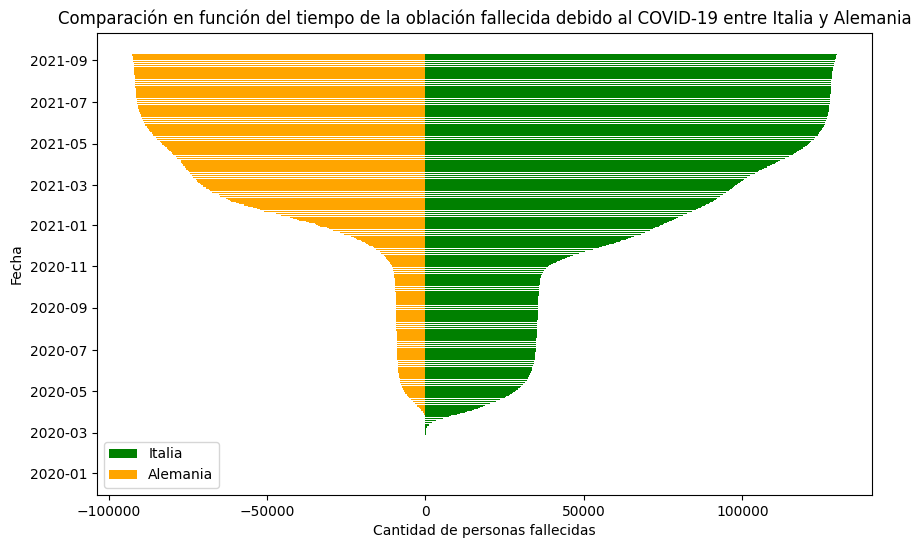

In [199]:
query = """
    SELECT country_name, date, deaths
    FROM `bigquery-public-data.covid19_govt_response.oxford_policy_tracker`
    WHERE country_name IN ('Italy', 'Germany')
    ORDER BY date DESC
    
"""

# Ejecuta la consulta y carga los resultados en un DataFrame
df = client.query(query).to_dataframe()

# Filtra los datos para Italia y Alemania
italy_data = df[df['country_name'] == 'Italy']
germany_data = df[df['country_name'] == 'Germany']

# Agrupa los datos por fecha y calcula la suma de muertes para cada país
italy_deaths = italy_data.groupby('date')['deaths'].sum()
germany_deaths = germany_data.groupby('date')['deaths'].sum()

# Crea el gráfico de pirámide
plt.figure(figsize=(10, 6))

# Grafica los datos de Italia
plt.barh(italy_deaths.index, italy_deaths.values, color='green', label='Italia')

# Grafica los datos de Alemania
plt.barh(germany_deaths.index, -germany_deaths.values, color='orange', label='Alemania')

# Configuración del gráfico
plt.xlabel('Cantidad de personas fallecidas')
plt.ylabel('Fecha')
plt.title('Comparación en función del tiempo de la oblación fallecida debido al COVID-19 entre Italia y Alemania')
plt.legend()

# Muestra el gráfico
plt.show()

Al analizar el gráfico obtenido es posible concluir que el territorio italiano presentó una mayor cantidad de personas fallecidas debido al COVID-19 desde el inicio de la pandemia. Es posible visibilizar que el conteo de personas fallecidas en Italia debido a la epidemia empieza aproximadamente uno o dos meses antes que surjan los primeros casos en territorio alemán. Además, al avanzar temporalmente se observa que tanto Alemania como Italia logran llegar a las 100000 personas fallecidas, sin embargo, en el instante en que Alemania llega a esa suma, Italia ya lo consiguió hace aproximadamente 6 meses atrás, produciendo que en su territorio esta cantidad lamentablemente siga subiendo. 

# Gráfico de Barras

Un gráfico de barras, también conocido como gráfico de barras o gráfico de columnas, es una representación gráfica de datos en forma de barras rectangulares, donde la longitud de cada barra es proporcional al valor que representa.

En este caso se utilizará este tipo de gráfico para comparar los casos confirmados de COVID-19 en territorio sudamericano, específicamente en los países por los cuales atraviesa la cordillera de los Andes, los cuales corresponden a Argentina, Bolivia, Chile, Colombia, Ecuador, Perú y Venezuela. Para poder generar este gráfico se utilizará nuevamente la sumatoria de una cantidad de datos, correspondiente a la cantidad de casos de COVID-19 confirmados. Para realizar este gráfico se utilizará el siguiente código:

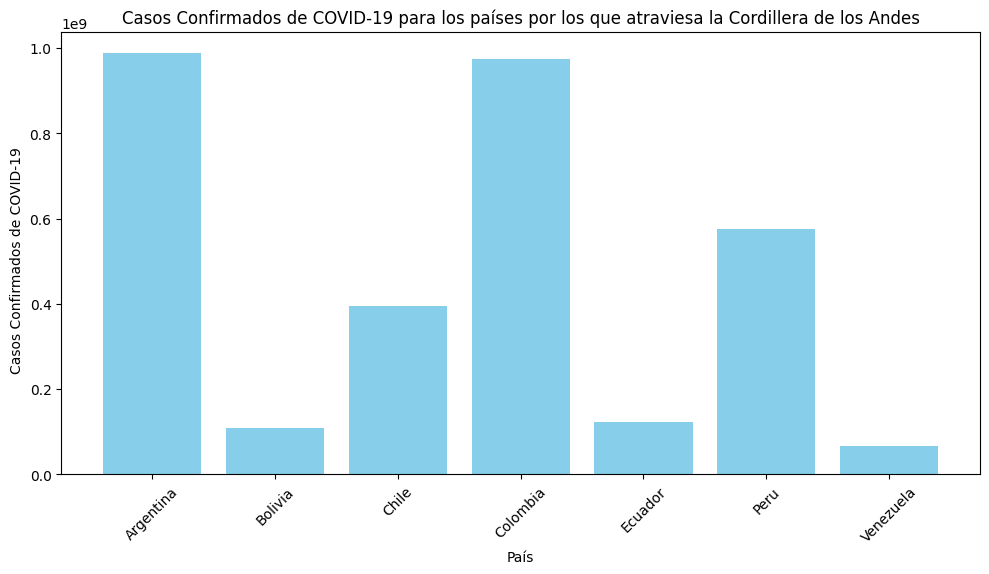

In [200]:
query = """
    SELECT country_name, SUM(confirmed_cases) AS total_confirmed_cases
    FROM `bigquery-public-data.covid19_govt_response.oxford_policy_tracker`
    WHERE country_name IN ('Argentina', 'Bolivia', 'Chile', 'Colombia', 'Ecuador', 'Peru', 'Venezuela')
    GROUP BY country_name
"""

# Ejecuta la consulta y carga los resultados en un DataFrame
df = client.query(query).to_dataframe()

# Configura el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df['country_name'], df['total_confirmed_cases'], color='skyblue')

# Configuración del gráfico
plt.xlabel('País')
plt.ylabel('Casos Confirmados de COVID-19   ')
plt.title('Casos Confirmados de COVID-19 para los países por los que atraviesa la Cordillera de los Andes')

# Muestra el gráfico
plt.xticks(rotation=45)  # Rotación de los nombres de los países en el eje X para mejor visualización
plt.tight_layout()  # Ajusta el diseño del gráfico para evitar superposiciones
plt.show()

Analizando el gráfico obtenido es posible concluir que los dos países que presentan una elevada cantidad de casos confirmados de COVID-19 corresponden a Argentina y Colombia, en tercer lugar pero con aproximadamente la mitad de los casos presentes en la Argentina le sigue Perú, en un cuarto lugar Chile, y los 3 países en los cuáles se presentan pocos casos de COVID-19 confirmados corresponden a el territorio Boliviano, Ecuatoriano y Venezolano.